# 4 - Fitting more General Functions

In the previous notebook we saw how to fit both quadratic and cubic polynomials from data.  As always, we had set of $x$ observations

$$
\mathbf{x} = \, \begin{bmatrix} x_1 \\ x_2 \\ x_3 \\ \vdots \\ x_N \end{bmatrix}
$$

an associated set of $y$ observations

$$
\mathbf{y} = \, \begin{bmatrix} y_1 \\ y_2 \\ y_3 \\ \vdots \\ y_N \end{bmatrix}
$$

and our goal was to find some non-linear relationship between the two. In the quadratic case we proposed that the following model

$$
\hat{y}(x) = a + bx + cx^2
$$

Given a certain $a, b$ and $c$ we could construct a vector of *predictions* $\hat{\mathbf{y}}$

$$
\begin{align}
\hat{\mathbf{y}} &= 
a \begin{bmatrix} 1 \\ 1 \\ 1 \\ \vdots \\ 1 \end{bmatrix} + 
b \begin{bmatrix} x_1 \\ x_2 \\ x_3 \\ \vdots \\ x_N \end{bmatrix} + 
c \begin{bmatrix} x_1^2 \\ x_2^2\\ x_3^2 \\ \vdots \\ x_N^2 \end{bmatrix} \\[0.5cm]
 &=  \begin{bmatrix} a \\ a \\ a \\ \vdots \\ a \end{bmatrix} + 
\begin{bmatrix} b x_1 \\ bx_2 \\ bx_3 \\ \vdots \\ bx_N \end{bmatrix} + 
\begin{bmatrix} cx_1^2 \\ cx_2^2\\ cx_3^2 \\ \vdots \\ cx_N^2 \end{bmatrix} \\[0.5cm]
 &=  \begin{bmatrix} a + bx_1 + cx_1^2 \\ a + bx_2 + cx_2^2  \\ a + bx_3 + cx_3^2  \\ \vdots \\ a + bx_N + cx_N^2  \end{bmatrix}
\end{align} 
$$

This was totally equivalent to the following *matrix-vector product*

$$
\hat{\mathbf{y}} = X\mathbf{w}
$$

where

$$
\mathbf{w} = \begin{bmatrix} a \\ b \\ c  \end{bmatrix}
$$

and 

$$
X =  \begin{bmatrix} 1 & x_1 & x_1^2 \\ 1 & x_2 & x_2^2  \\ 1 & x_3 & x_3^2  \\ \vdots \\ 1 & x_N & x_N^2  \end{bmatrix}
$$

Similarly, the same equation $\hat{\mathbf{y}} = X\mathbf{w}$ holds for the cubic case, except here

$$
X =  \begin{bmatrix} 1 & x_1 & x_1^2 & x_1^3 \\ 1 & x_2 & x_2^2  & x_2^3 \\ 1 & x_3 & x_3^2 & x_3^3 \\ \vdots \\ 1 & x_N & x_N^2 & x_N^3  \end{bmatrix}
$$


## Exercise 1

Below is a pre-written function that takes in a set of x-observations, a set of y-observations, and a number defining the *order* of the polynomial you want to fit (1=linear, 2=quadratic, 3=cubic etc) The function then finds the best-fit polynomial of that order and plots it. Read through this function and try to understand each line. Then try calling it using the data provided. What order polynomial do you think is appropriate for this data?

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
%matplotlib notebook

In [6]:
%matplotlib notebook

In [55]:
def fit_polynomial(x_data, y_data, order):
    
    # this is a helper function that creates the X matrix given x_data
    # Note: there's nothing wrong with defining functions *within* other functions
    def make_X(x):
        X = np.zeros((len(x), order + 1))
        for i in range(order + 1):
            X[:, i] = x ** i
        return X
    
    # create the X matrix
    X = make_X(x_data)
    
    # fit the parameters
    w_fit = np.linalg.lstsq(X, y_data)[0]
    
    # scatter the data
    plt.figure()
    plt.scatter(x_data, y_data)
    
    # create a 250-long 'x_space' variable for plotting the function
    x_space = np.linspace(x_data.min(), x_data.max(), 250)
    
    # make a y_fit array. 
    # Note: '@' means *matrix multiply*
    y_fit = make_X(x_space) @ w_fit
    
    # plot the fitted function 
    plt.plot(x_space, y_fit)
    

In [60]:
x_data = np.array([-10, -9.41, -8.82, -8.24, -7.65, -7.06, -6.47, -5.88, -5.29, -4.71, -4.12, -3.53, -2.94, -2.35, -1.76, -1.18, -0.59, 0, 0.59, 1.18, 1.76, 2.35, 2.94, 3.53, 4.12, 4.71, 5.29, 5.88, 6.47, 7.06, 7.65, 8.24, 8.82, 9.41, 10.])
y_data = np.array([120.5, 84.17, 61, 43.61, 35.8, 29.65, 22.79, 30.28, 36.7, 23.3, 22.27, -1.7, 4.53, -8.21, -17.71, -19.81, -8.12, 3.54, 8.29, 9.92, 15.91, 11.49, 1.45, -3.3, -17.51, -20.91, -20.51, -15.95, -18.12, -14.5, -21.79, -29.11, -52.83, -72.58, -94.42])

# YOUR CODE HERE


# A More General Perspective



<IPython.core.display.Javascript object>


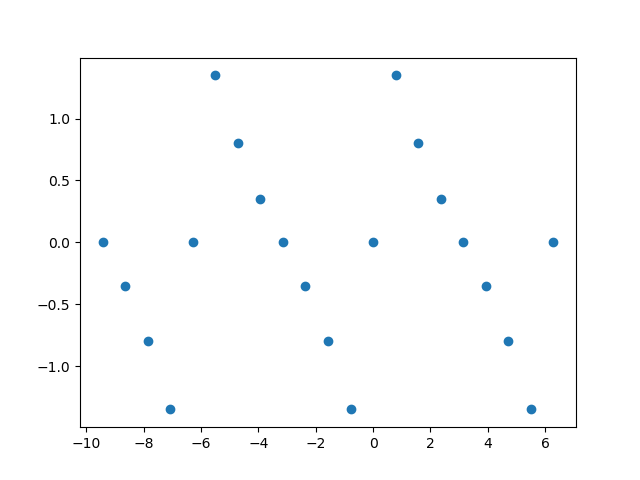

In [64]:
x = np.linspace(-3 * np.pi, 2 * np.pi, 21)
y = np.sin(x) + 0.5 * np.sin(2 * x) + 0.2 * np.sin(3 * x)

plt.figure()
plt.scatter(x, y)